# Import and Read in the data

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('survey_results_public.csv')

In [82]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [83]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"EdLevel": "Education", "YearsCodePro": "Total Years", "ConvertedCompYearly": "Salary"}, axis = 1)
df.head()

,Country,Education,Total Years,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [84]:
df = df[df["Salary"].notnull()]
df.head()

,Country,Education,Total Years,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      46844 non-null  object 
 1   Education    46823 non-null  object 
 2   Total Years  46391 non-null  object 
 3   Employment   46831 non-null  object 
 4   Salary       46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [86]:
df = df.dropna()
df.isnull().sum()

Country        0
Education      0
Total Years    0
Employment     0
Salary         0
dtype: int64

In [87]:
df = df[df['Employment'] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      40211 non-null  object 
 1   Education    40211 non-null  object 
 2   Total Years  40211 non-null  object 
 3   Salary       40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [88]:
df["Country"].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [89]:
def shorten_options(options, threshold):
    categorical_map = {}
    for i in range(len(options)):
        if options.values[i] >= threshold:
            categorical_map[options.index[i]] = options.index[i]
        else:
            categorical_map[options.index[i]] = 'Other'
    return categorical_map

In [90]:
country_map = shorten_options(df.Country.value_counts(), 500)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   12448
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Name: Country, dtype: int64

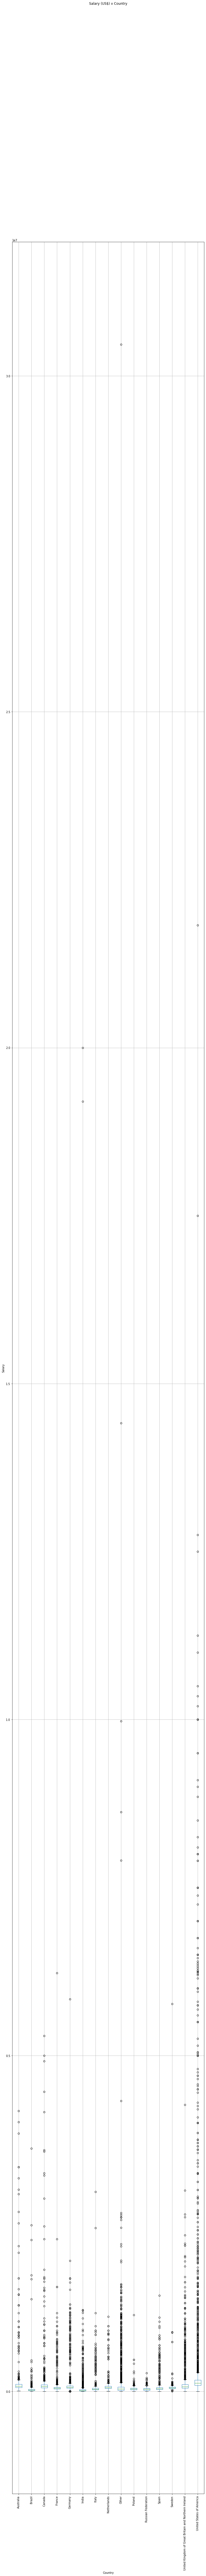

In [91]:
fig, ax = plt.subplots(1,1, figsize=(12, 150))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [92]:
df = df[df["Salary"] <= 200000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

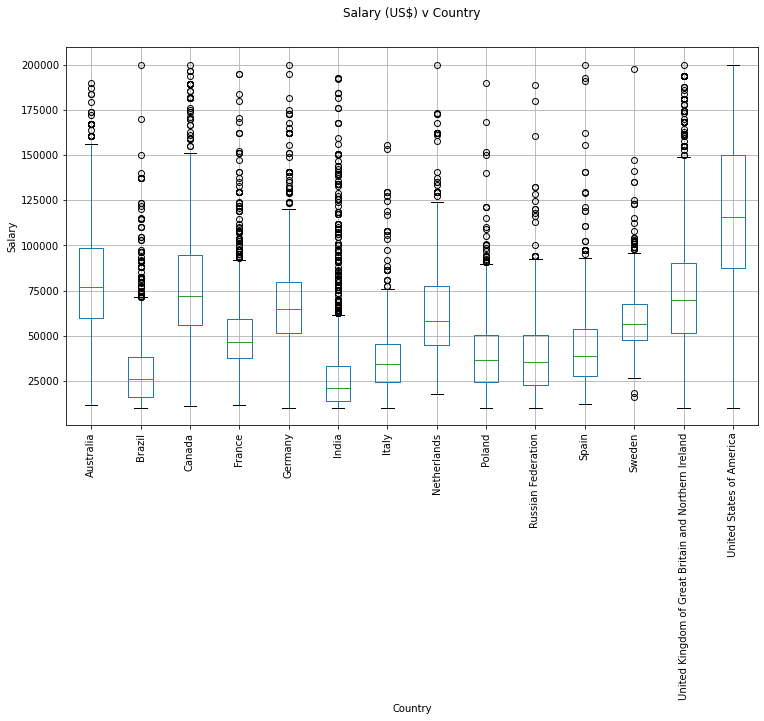

In [93]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [94]:
df["Total Years"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '34', '11', '25', '24',
       '22', '13', '9', '26', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '43', '40', '29', '38', '31', '42', '28', '46', '32',
       '36', '37', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [95]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['Total Years'] = df['Total Years'].apply(clean_experience)

In [96]:
df["Education"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [97]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['Education'] = df['Education'].apply(clean_education)

In [98]:
df["Education"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

In [99]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['Education'] = le_education.fit_transform(df['Education'])
df["Education"].unique()

array([2, 0, 3, 1])

In [100]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([11, 10,  4,  2,  3, 12,  9, 13,  1,  6,  7,  8,  0,  5])

In [101]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [102]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [103]:
y_pred = linear_reg.predict(X)

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
ms_error = np.sqrt(mean_squared_error(y, y_pred))
ms_error

37190.20943279161

In [105]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [106]:
y_pred = dec_tree_reg.predict(X)

In [107]:
ms_error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(ms_error))

$27,116.71


In [108]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [109]:
y_pred = random_forest_reg.predict(X)

In [110]:
ms_error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(ms_error))

$27,166.58


In [111]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12,14,16,18,20]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18,
                                       20]},
             scoring='neg_mean_squared_error')

In [112]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
ms_error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(ms_error))

$28,069.90


In [113]:
X

,Country,Education,Total Years
9,11,2,4.0
11,10,0,5.0
12,4,2,6.0
17,2,0,6.0
23,3,2,2.0
...,...,...,...
83430,13,2,21.0
83432,2,0,0.5
83434,13,0,5.0
83436,13,1,4.0


In [114]:
# country, education, total_years
X = np.array([["India", 'Master’s degree', 15 ]])
X

array([['India', 'Master’s degree', '15']], dtype='<U15')

In [115]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[ 5.,  2., 15.]])

In [116]:
y_pred = regressor.predict(X)
y_pred

C:\Users\bitaa\.conda\envs\ml\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([42017.28735632])

In [117]:
import pickle

In [118]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [119]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [120]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\bitaa\.conda\envs\ml\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([42017.28735632])